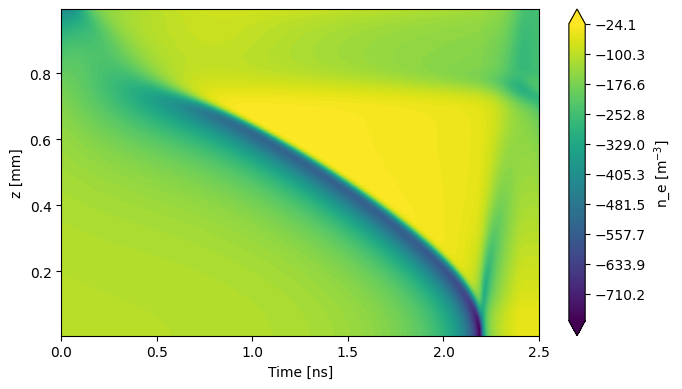

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

axis_dir = Path("output_axis")
grid_dir = Path("outputdata_npy")

# --- 必須ファイル読み込み ---
ne_axis = np.load(axis_dir / "ne_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
Om_axis = np.load(axis_dir / "Om_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
O2m_axis = np.load(axis_dir / "O2m_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
O2p_axis = np.load(axis_dir / "O2p_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
N2p_axis = np.load(axis_dir / "N2p_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
Ey_axis = np.load(axis_dir / "Ey_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
phi_axis = np.load(axis_dir / "phi_axis.npy", mmap_mode="r")   # shape ~ (T_max, NZ)
time    = np.load(axis_dir / "time.npy", mmap_mode="r")      # shape (T_max,)
zh      = np.load(grid_dir / "zh.npy")                       # shape (NZ,)

chg = (N2p_axis+O2p_axis) - (ne_axis+Om_axis+O2m_axis)

# --- どこまで書けているか（途中停止対応） ---
meta_path = axis_dir / "axis_meta.json"
if meta_path.exists():
    with open(meta_path, "r", encoding="utf-8") as f:
        meta = json.load(f)
    T = int(meta.get("next_index", 0))
else:
    # メタがなければ、有効な time の要素数で推定
    T = int(np.count_nonzero(np.isfinite(time)))

if T == 0:
    raise RuntimeError("有効な時系列データが見つかりません。シミュレーションを少なくとも1ステップ実行してください。")

# --- 軸（単位変換） ---
t_ns = time[:T] * 1e9   # s -> ns
z_mm = zh * 1e3         # m -> mm

# --- 等高線用のグリッド（X: 時間, Y: z） ---
TT, ZZ = np.meshgrid(t_ns, z_mm, indexing="xy")   # shape: (NZ, T)
Zdata = Ey_axis[:T, :].T                          # (NZ, T) に転置

# --- 描画 ---
vmin, vmax = Zdata.min(), Zdata.max()
levels = np.linspace(vmin, vmax, 100)

plt.figure(figsize=(7, 4))
cs = plt.contourf(
    TT, ZZ, Zdata,
    levels=levels,
    vmin=vmin, vmax=vmax,
    extend="both",          # ★ これがポイント
    cmap="viridis"
)
plt.xlabel("Time [ns]")
plt.ylabel("z [mm]")
plt.xlim([0, 2.5])

cbar = plt.colorbar(cs)
cbar.set_label("n_e [m$^{-3}$]")

plt.tight_layout()
plt.show()


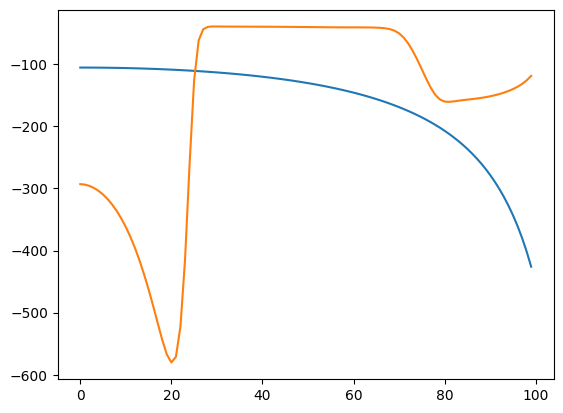

In [17]:

en = 2000
plt.plot(Zdata[:,1])
plt.plot(Zdata[:,en-1])
#plt.ylim([-0.1e20,0.3e20])